In [15]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


`sklearn.datasets`: This module of scikit-learn provides standard datasets such as the Iris dataset. 

`load_iris()`: This is a function within datasets module that loads and returns the iris dataset (classification).

`iris.data`: This is an array with the iris dataset's features. It's a 2D array where each row is an example and each column is a feature of that example.

`iris.target`: This is an array with the iris dataset's targets (class labels). It's a 1D array where each entry corresponds to the class label of the corresponding example in iris.data.

`np.unique(Y)`: This function returns the sorted unique elements of an array. Here, it's used to identify the unique class labels in the dataset.


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

`train_test_split`: This function divides the dataset into training and test subsets.

`test_size`: This parameter specifies the proportion of the dataset to include in the test subset.

`random_state`: This parameter sets the seed for random number generator, ensuring consistent division of the dataset each time the code is run, thus making the code reproducible.

`stratify=y`: This causes the training and test sets to have the same proportion of the class labels as the input dataset.

We can verify that the proportions of the class labels in the dataset are upheld among training and test sets:

In [17]:
print('Labels counts in y: ', np.bincount(y))

Labels counts in y:  [50 50 50]


In [18]:
print('Labels counts in y_train: ', np.bincount(y_train))

Labels counts in y_train:  [35 35 35]


In [19]:
print('Labels counts in y_test: ', np.bincount(y_test))

Labels counts in y_test:  [15 15 15]


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

`StandardScaler`: This is a class that standardizes features by removing the mean and scaling to unit variance. 

`sc = StandardScaler()`: This creates an instance of `StandardScaler` class.

`sc.fit(X_train)`: This method computes the mean and standard deviation of `X_train`. These values are stored within the instance of the class. 

`sc.transform(X_train)`: This method standardizes the `X_train` dataset.

`sc.transform(X_test)`: This method standardizes the `X_test` dataset using the mean and variance calculated from the `X_train` dataset. 

It's worth noting that the mean and standard deviation used to standardize the `X_test` dataset are calculated from the `X_train` dataset. This is done to make data in both datasets comparable to each other. Standardizing the dataset ensures that the features are on the same scale, which is crucial for fast convergence for many optimization algorithms.

In [21]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 = 0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

`eta0`: This specifies the learning rate

`fit`: This method trains the model on the training dataset.

In [22]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


Model missclassified 1 example out of 45 examples;

1 - $\frac{1}{45}$ = 0.9777 $\approx$ 0.97

In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

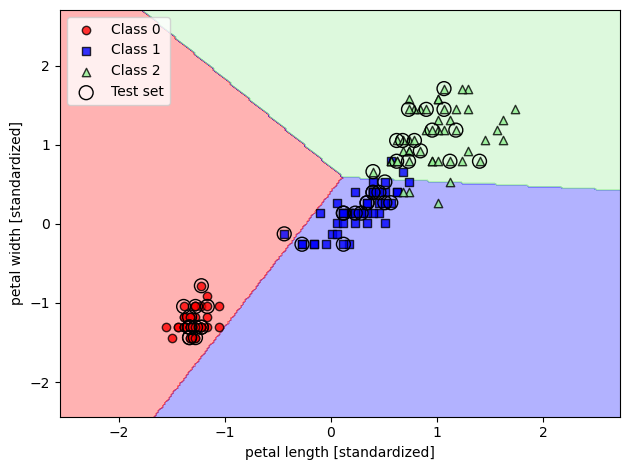

In [24]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Modeling class probabilities via logistic regression

Sigmoid function for values within the range [-7,7]:

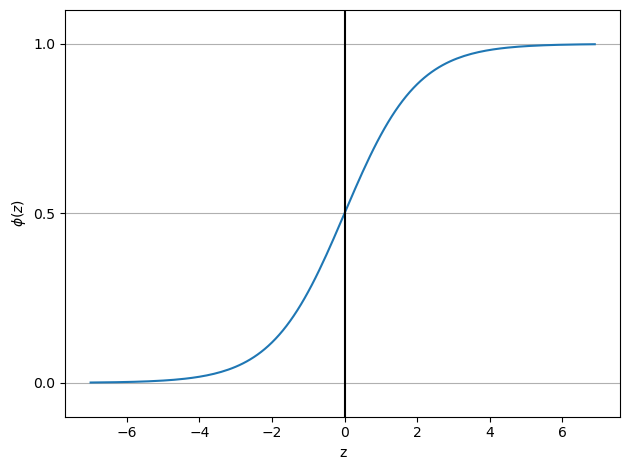

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)

phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

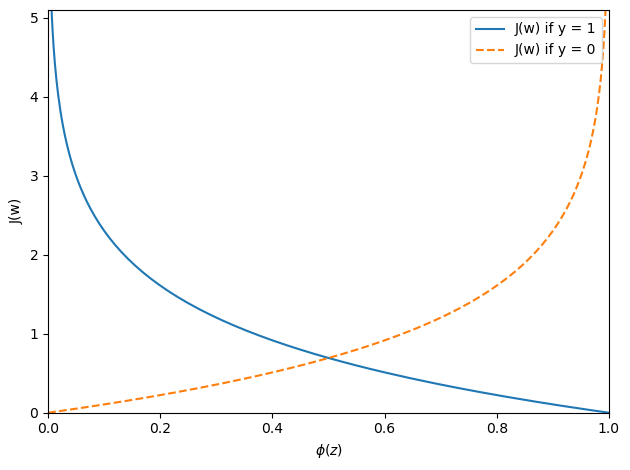

In [26]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1-sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label = 'J(w) if y = 1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y = 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi (z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [28]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # note that we compute the logistic 'cost' now
            # instead of the sum of squared errors cost
            cost = (-y.dot(np.log(output)) -
            ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


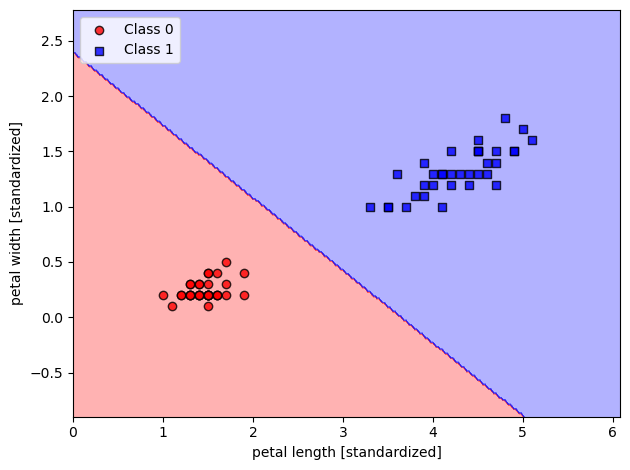

In [33]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05,n_iter=30,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Training a logistic regression model with scikit-learn

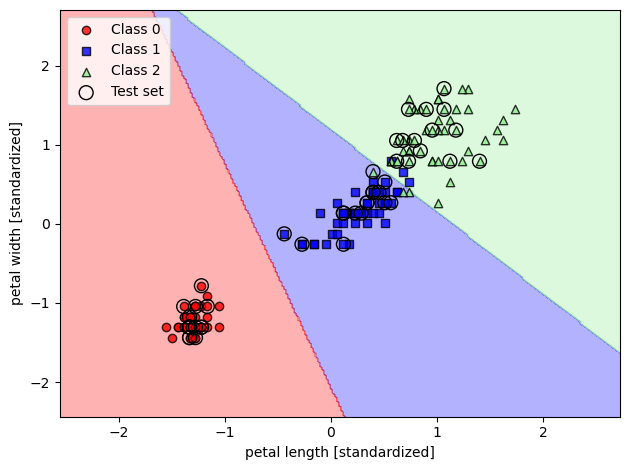

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, random_state = 1, solver = 'lbfgs', multi_class = 'ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## Predicting probability that training example belongs to a certain class

The model will predict probabilities for the first three test examples:

In [37]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

The first row presents the probabilities of the examples being classified as members of the first class. The same applies for the second and third rows. These probabilities can be used to classify the training examples. Specifically, the training example is assigned to the class corresponding to the row with the highest value in its column. To show this, we can run the following line:

In [38]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)